In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import kerasNN
import datacontrol
import validation
import itertools
from sklearn.model_selection import train_test_split
import time

In [42]:
TrainingData = datacontrol.readFile("../data/Development.csv")
X, Y = datacontrol.divide(TrainingData)
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42, shuffle = True)


<h>First network- very big!(already tuned the eta)</h>

loss: 1.03
time: 435.412139


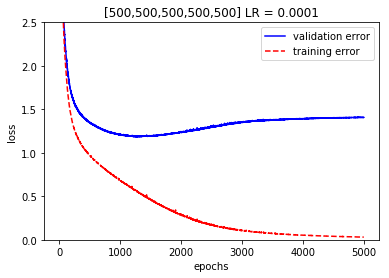

1.032862374663253

In [11]:
NN = kerasNN.KerasNN(NetworArchitecture = [500, 500, 500, 500, 500], activation = "relu", eta = 0.0001, momentum = 0.9, epochs = 5000)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

Second Netowrk- smaller (already tuned the eta)

loss: 1.00
time: 304.826204


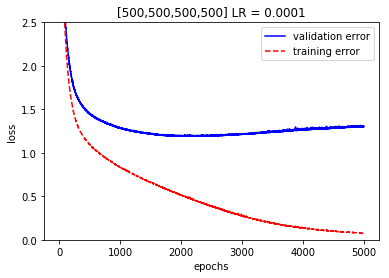

1.004419310437403

In [12]:
NN = kerasNN.KerasNN(NetworArchitecture = [500, 500, 500, 500], activation = "relu", eta = 0.0001, momentum = 0.9, epochs = 5000)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

loss: 1.03
time: 56.785615


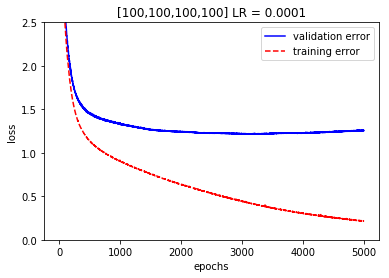

1.0274254656959132

In [13]:
NN = kerasNN.KerasNN(NetworArchitecture = [100, 100, 100, 100], activation = "relu", eta = 0.0001, momentum = 0.9, epochs = 5000)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

loss: 1.05
time: 39.763056


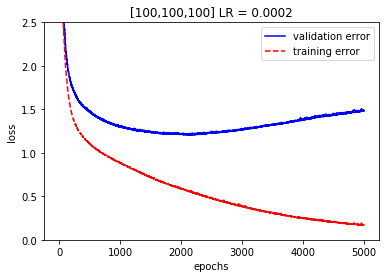

1.0517821533921312

In [19]:
NN = kerasNN.KerasNN(NetworArchitecture = [100, 100, 100], activation = "relu", eta = 0.0002, momentum = 0.9, epochs = 5000)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

loss: 1.01
time: 34.997588


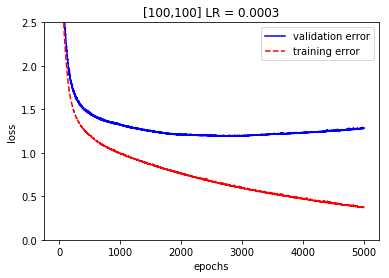

1.0058196672291897

In [21]:
NN = kerasNN.KerasNN(NetworArchitecture = [100, 100], activation = "relu", eta = 0.0003, momentum = 0.9, epochs = 5000)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

loss: 1.03
time: 26.886306


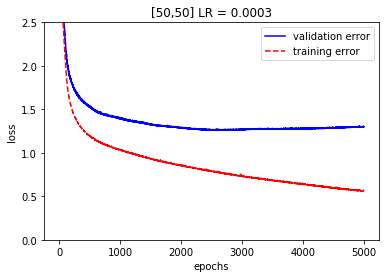

1.0274224725360792

In [24]:
NN = kerasNN.KerasNN(NetworArchitecture = [50, 50], activation = "relu", eta = 0.0003, momentum = 0.9, epochs = 5000)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

Now we implement the cross validation: we have writtena funciton that implements it by himself.

In [43]:
SMALL = kerasNN.KerasNN(NetworArchitecture = [50, 50], activation = "relu", eta = 0.0003, momentum = 0.9, epochs = 2600)
MEDIUM = kerasNN.KerasNN(NetworArchitecture = [100, 100, 100], activation = "relu", eta = 0.0002, momentum = 0.9, epochs = 1500)
BIG = kerasNN.KerasNN(NetworArchitecture = [500, 500, 500, 500, 500], activation = "relu", eta = 0.0001, momentum = 0.9, epochs = 1000)

we find out that the minimun is reached after 2600 epochs in average

In [44]:
start = time.time()
smallval, smalltrain = SMALL.trainCV(X, Y, plot=False)
smalltime = time.time()- start

kerasNN

Min loss on validation set was on epoch 2143
Min loss on validation set was on epoch 2545
Min loss on validation set was on epoch 1707
Min loss on validation set was on epoch 1845
Min loss on validation set was on epoch 2475

 Time: 179.47
1.03 (+/- 0.04)
0.90 (+/- 0.01)


we find out that the minimun is reached after 1500 epochs in average

In [45]:
start = time.time()
mediumval, mediumtrain = MEDIUM.trainCV(X, Y, plot=False)
mediumtime = time.time() - start

kerasNN

Min loss on validation set was on epoch 1093
Min loss on validation set was on epoch 1498
Min loss on validation set was on epoch 1344
Min loss on validation set was on epoch 786
Min loss on validation set was on epoch 1366

 Time: 191.01
1.03 (+/- 0.04)
0.89 (+/- 0.02)


we find out that the minimun is reached after 1000 epochs in average

In [46]:
start = time.time()
bigval, bigtrain = BIG.trainCV(X, Y, plot=False)
bigtime = time.time() - start

kerasNN

Min loss on validation set was on epoch 936
Min loss on validation set was on epoch 998
Min loss on validation set was on epoch 996
Min loss on validation set was on epoch 853
Min loss on validation set was on epoch 980

 Time: 869.31
1.01 (+/- 0.05)
0.87 (+/- 0.01)


In [47]:
d = {"name": ["2L50", "3L100", "5L500"], 
     'validation Mean Error': [np.mean(smallval), np.mean(mediumval),np.mean(bigval)], 
     'validation std Error': [np.std(smallval), np.std(mediumval),np.std(bigval)], 
     'Training Mean Error':  [np.mean(smalltrain), np.mean(mediumtrain),np.mean(bigtrain)], 
     'Training std Error':  [np.std(smalltrain), np.std(mediumtrain),np.std(mediumtrain)], 
     "time": [smalltime/5, mediumtime/5, bigtime/5]
    }
df = pd.DataFrame(data=d)
df.to_csv("../result/NNCrossValidation.csv")
df.to_latex("../LatexTable/NNCrossValidation.txt")

In [48]:
df.to_csv("../result/NNCrossValidation.csv")

In [49]:
df.to_latex("../LatexTable/NNCrossValidation.txt")

We now train a network with dropout

Min loss on validation set was on epoch 382
loss: 0.94
time: 759.928046


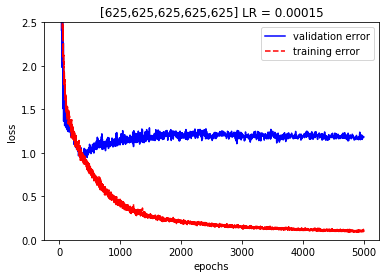

0.9420232205182834

In [51]:
NN = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 5000, DropOutHiddenLayer = 0.2)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

Min loss on validation set was on epoch 337
loss: 0.98
time: 58.938208


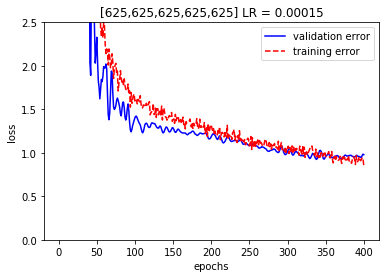

0.9784420602948911

In [50]:
NN = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 400, DropOutHiddenLayer = 0.2)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

In [ ]:
start = time.time()
NNDropOut = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 5000, DropOutHiddenLayer = 0.2)
valdd, traindd = NNDropOut.trainCV(X, Y, plot=False)
timedd = time.time() - start

kerasNN

Min loss on validation set was on epoch 4622


In [29]:
d = {"name": ["5L500+Dropout(0.8)"], 
     'validation Mean Error': [np.mean(valdd)], 
     'validation std Error': [np.std(valdd)], 
     'Training Mean Error':  [np.mean(traindd)], 
     'Training std Error':  [np.std(traindd)], 
     "time": [timedd/5]
    }
df = pd.DataFrame(data=d)
df.to_csv("../result/NNCrossValidationDropOut.csv")
df.to_latex("../LatexTable/NNCrossValidationDropOut.txt")

loss: 0.94
time: 1631.579569


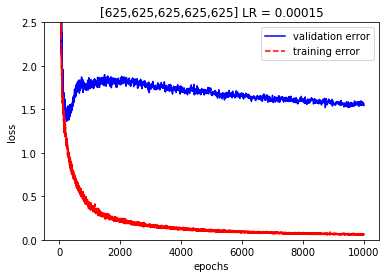

0.9411691622857817

In [30]:
NN = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 10000, DropOutHiddenLayer = 0.2)
NN.trainValidation(X_train, y_train,X_test, y_test, plot=True)

In [31]:
start = time.time()
NNDropOut = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 400, DropOutHiddenLayer = 0.2)
valdd, traindd = NNDropOut.trainCV(X, Y, plot=False)
timedd = time.time() - start

kerasNN

Min loss on validation set was on epoch 283
Min loss on validation set was on epoch 261
Min loss on validation set was on epoch 294
Min loss on validation set was on epoch 332
Min loss on validation set was on epoch 396

 Time: 331.55
0.99 (+/- 0.04)
0.88 (+/- 0.04)


In [38]:
start = time.time()
NNDropOut = kerasNN.KerasNN(NetworArchitecture = [625, 625, 625, 625, 625], activation = "relu", eta = 0.00015, momentum = 0.99, epochs = 10000, DropOutHiddenLayer = 0.2)
valdd, traindd = NNDropOut.trainCV(X, Y, plot=False)
timedd = time.time() - start

kerasNN

No Drop out in the input layer
DropOut un the hidden layer. Value:  0.2
Min loss on validation set was on epoch 9992
Min loss on validation set was on epoch 662
Min loss on validation set was on epoch 423
Min loss on validation set was on epoch 397
Min loss on validation set was on epoch 9962

 Time: 7837.05
0.92 (+/- 0.04)
0.41 (+/- 0.02)
